<a href="https://colab.research.google.com/github/Te-ne/Corn_disease_prediction/blob/main/Web_based_pathogen_classification_for_cassava_and_corn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing kaggle
!pip install -q kaggle

In [2]:
#uploading kaggle.json file
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tenesha","key":"293f8bcf92ba2b8aaccd8b6e29bbdb4b"}'}

In [3]:
#Create a kaggle directory
!mkdir -p ~/.kaggle

In [4]:
#Copy json file to the new directory
!cp kaggle\ \(1\).json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle\ \(1\).json
!ls ~/.kaggle

'kaggle (1).json'


In [6]:
#Download required dataset for corn
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset
#unzip required dataset
!unzip corn-or-maize-leaf-disease-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
License(s): copyright-authors
100% 160M/161M [00:10<00:00, 17.6MB/s]
100% 161M/161M [00:10<00:00, 16.7MB/s]
Archive:  corn-or-maize-leaf-disease-dataset.zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  infla

In [7]:
#For Maize
!kaggle datasets download -d nirmalsankalana/cassava-leaf-disease-classification
!unzip cassava-leaf-disease-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Cassava___mosaic_disease/3371574415.jpg  
  inflating: data/Cassava___mosaic_disease/3371705834.jpg  
  inflating: data/Cassava___mosaic_disease/3371952476.jpg  
  inflating: data/Cassava___mosaic_disease/3373304739.jpg  
  inflating: data/Cassava___mosaic_disease/3373453090.jpg  
  inflating: data/Cassava___mosaic_disease/3373536107.jpg  
  inflating: data/Cassava___mosaic_disease/3373743927.jpg  
  inflating: data/Cassava___mosaic_disease/3374850417.jpg  
  inflating: data/Cassava___mosaic_disease/3375224217.jpg  
  inflating: data/Cassava___mosaic_disease/3375409497.jpg  
  inflating: data/Cassava___mosaic_disease/3376184680.jpg  
  inflating: data/Cassava___mosaic_disease/3376245698.jpg  
  inflating: data/Cassava___mosaic_disease/3376270553.jpg  
  inflating: data/Cassava___mosaic_disease/3376371946.jpg  
  inflating: data/Cassava___mosaic_disease/3376406341.jpg  
  inflating: data/Cassava___mosaic_disease/337663

In [8]:
#import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.keras import layers
#from tensorflow.layers import models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import pandas as pd
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [9]:
if os.path.isdir('data') is False:
    os.makedirs('data')
shutil.copytree('/content/data/Cassava___bacterial_blight', '/content/data/cassava/Cassava_bacterial_blight', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Cassava___brown_streak_disease', '/content/data/cassava/Cassava_brown_streak_disease', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Cassava___green_mottle', '/content/data/cassava/Cassava_green_mottle', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Cassava___healthy', '/content/data/cassava/Cassava_healthy', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Cassava___mosaic_disease', '/content/data/cassava/Cassava_mosaic_disease', dirs_exist_ok=True)
print('File copied successfully')

File copied successfully
File copied successfully
File copied successfully
File copied successfully
File copied successfully


In [10]:

dir_path = '/content/data/cassava/Cassava_bacterial_blight'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Bacterial blight images:', count)
dir_path = '/content/data/cassava/Cassava_brown_streak_disease'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Brown streak images:', count)
dir_path = '/content/data/cassava/Cassava_green_mottle'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Gray leaf spot images:', count)
dir_path = '/content/data/cassava/Cassava_healthy'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Healthy images:', count)
dir_path = '/content/data/cassava/Cassava_mosaic_disease'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Mosaic disease images:', count)

Bacterial blight images: 1087
Brown streak images: 2189
Gray leaf spot images: 2386
Healthy images: 2577
Mosaic disease images: 13158


In [11]:
shutil.copytree('/content/data/Blight', '/content/data/corn/Blight', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Common_Rust', '/content/data/corn/Common_Rust', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Gray_Leaf_Spot', '/content/data/corn/Gray_Leaf_Spot', dirs_exist_ok=True)
print('File copied successfully')
shutil.copytree('/content/data/Healthy', '/content/data/corn/Healthy', dirs_exist_ok=True)
print('File copied successfully')

File copied successfully
File copied successfully
File copied successfully
File copied successfully


In [12]:
dir_path = '/content/data/corn/Blight'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Blight images:', count)
dir_path = '/content/data/corn/Common_Rust'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Common Rust images:', count)
dir_path = '/content/data/corn/Gray_Leaf_Spot'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Gray leaf spot images:', count)
dir_path = '/content/data/corn/Healthy'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Healthy images:', count)

Blight images: 1146
Common Rust images: 1306
Gray leaf spot images: 574
Healthy images: 1162


# ***Cassava Data Preprocessing***

In [13]:
BATCHSIZE = 32
LG_IMGSIZE = (256, 256)
SM_IMGSIZE = (32, 32)

dataDir = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/data/cassava",
    batch_size = BATCHSIZE,
    image_size = LG_IMGSIZE,
)

Found 21397 files belonging to 5 classes.


In [14]:
ClassNames = dataDir.class_names
ClassNames

['Cassava_bacterial_blight',
 'Cassava_brown_streak_disease',
 'Cassava_green_mottle',
 'Cassava_healthy',
 'Cassava_mosaic_disease']

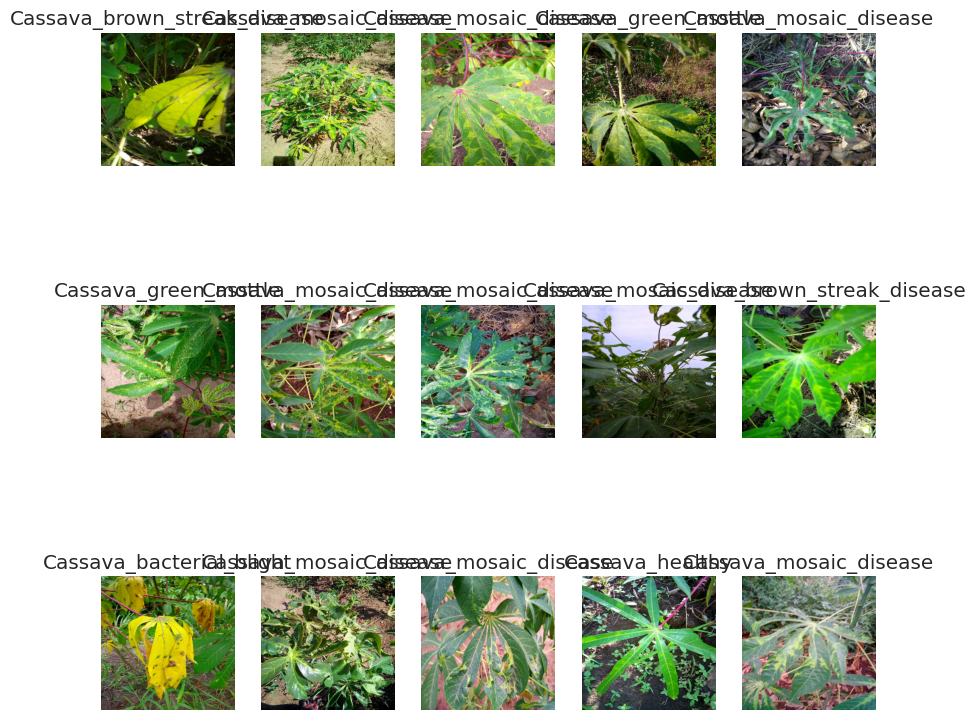

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in dataDir.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(ClassNames[labels[i]], fontsize='x-large', fontweight='ultralight')
        plt.axis("off")

In [16]:
!cd /content/data/cassava

In [17]:
!pip install split-folders
import splitfolders
splitfolders.ratio('data/cassava', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 21397 files [00:24, 890.15 files/s]


In [18]:
train_path = '/content/output/train'
test_path = '/content/output/test'
valid_path = '/content/output/val'

In [19]:
train_data = ImageDataGenerator( rescale=1./255,            # Rescale pixel values to be between 0 and 1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
).flow_from_directory(directory=train_path, target_size=(224,224), classes=['Cassava_bacterial_blight','Cassava_brown_streak_disease','Cassava_green_mottle','Cassava_healthy','Cassava_mosaic_disease'], batch_size=32, class_mode='categorical')#flow_from_directory

Found 17115 images belonging to 5 classes.


In [20]:
test_data= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path, target_size=(224,224), classes=['Cassava_bacterial_blight','Cassava_brown_streak_disease','Cassava_green_mottle','Cassava_healthy','Cassava_mosaic_disease'], batch_size=32, class_mode='categorical')
valid_data= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Cassava_bacterial_blight','Cassava_brown_streak_disease','Cassava_green_mottle','Cassava_healthy','Cassava_mosaic_disease'], batch_size=32, class_mode='categorical')

Found 2146 images belonging to 5 classes.
Found 2136 images belonging to 5 classes.


# ***Corn Dataset Pre-processing***

In [21]:
BATCHSIZE = 32
LG_IMGSIZE = (256, 256)
SM_IMGSIZE = (32, 32)

dataDir1 = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/data/corn",
    batch_size = BATCHSIZE,
    image_size = LG_IMGSIZE,
)

Found 4188 files belonging to 4 classes.


In [22]:
ClassNames1 = dataDir1.class_names
ClassNames1

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

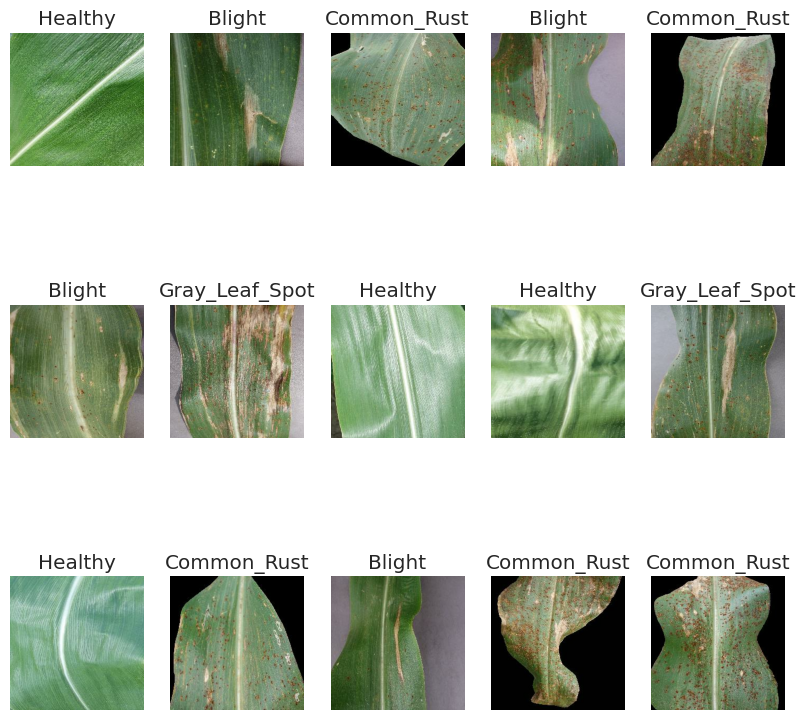

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in dataDir1.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(ClassNames1[labels[i]], fontsize='x-large', fontweight='ultralight')
        plt.axis("off")

In [24]:
!cd /content/data/corn

In [25]:

splitfolders.ratio('data/corn', output="output1", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 4188 files [00:01, 3262.40 files/s]


In [26]:
train_path1 = '/content/output1/train'
test_path1 = '/content/output1/test'
valid_path1 = '/content/output1/val'

In [27]:
train_data1 = ImageDataGenerator( rescale=1./255,            # Rescale pixel values to be between 0 and 1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
).flow_from_directory(directory=train_path1, target_size=(224,224), classes=['Common_Rust','Blight','Gray_Leaf_Spot','Healthy'], batch_size=32, class_mode='categorical')#flow_from_directory

Found 3348 images belonging to 4 classes.


In [28]:
test_data1= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path1, target_size=(224,224), classes=['Common_Rust','Blight','Gray_Leaf_Spot','Healthy'], batch_size=32, class_mode='categorical')
valid_data1= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_path1, target_size=(224,224), classes=['Common_Rust','Blight','Gray_Leaf_Spot','Healthy'], batch_size=32, class_mode='categorical')

Found 423 images belonging to 4 classes.
Found 417 images belonging to 4 classes.


# ***BUILDING AND TRAINING THE MODELS***

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [30]:
from tensorflow.keras.layers import BatchNormalization

def create_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate = 1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [31]:
#Train Corn Model
model_corn = create_model(4)
model_corn.fit(train_data1, epochs=10, validation_data=valid_data1)


# Save the models
model_corn.save('corn_disease_model.h5')
model_corn.save('corn_disease_model.keras')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 88s 675ms/step - accuracy: 0.6928 - loss: 1.7008 - val_accuracy: 0.2782 - val_loss: 17.9708
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 482ms/step - accuracy: 0.8116 - loss: 0.5091 - val_accuracy: 0.2782 - val_loss: 20.1028
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 480ms/step - accuracy: 0.8364 - loss: 0.3942 - val_accuracy: 0.2782 - val_loss: 13.6670
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 53s 476ms/step - accuracy: 0.8666 - loss: 0.3297 - val_accuracy: 0.6235 - val_loss: 2.3567
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 82s 469ms/step - accuracy: 0.8599 - loss: 0.3365 - val_accuracy: 0.8201 - val_loss: 0.5040
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 82s 480ms/step - accuracy: 0.8768 - loss: 0.3085 - val_accuracy: 0.8177 - val_loss: 0.4117
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 509ms/step - accuracy: 0.8829 - loss: 0.3024 - val_accuracy: 0.8585 - val_loss: 0.3272
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 79s 482ms/step - accuracy: 0.8700 - loss: 0.2980 - 

In [ ]:
# Train Cassava Model
model_cassava = create_model(5)
model_cassava.fit(train_data, epochs=, validation_data=valid_data)
model_cassava.save('cassava_disease_model.h5')
model_cassava.save('cassava_disease_model.keras')


# ***MODEL EVALUATION***

In [32]:
train_loss, train_acc = model_corn.evaluate(train_data1)
val_loss, val_acc = model_corn.evaluate(valid_data1)
print('Train accuracy:', train_acc)
print('Valid accuracy:', val_acc)

105/105 ━━━━━━━━━━━━━━━━━━━━ 52s 493ms/step - accuracy: 0.8993 - loss: 0.2299
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8997 - loss: 0.2908
Train accuracy: 0.897849440574646
Valid accuracy: 0.9040767550468445


In [ ]:
train_loss, train_acc = model_cassava.evaluate(train_data)
val_loss, val_acc = model_cassava.evaluate(valid_data)
print('Train accuracy:', train_acc)
print('Valid accuracy:', val_acc)

In [43]:
model_corn.history

In [ ]:
#recording history in json
import json
with open('corn_history.json', 'w') as f:
    json.dump(model_corn.history, f)

In [ ]:
with open('cassava_history.json', 'w') as f:
    json.dump(model_cassava.history, f)

# ***Accuracy visualization***

In [45]:
y_pred = model_corn.predict(test_data1)
predicted_categories = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step


In [ ]:

true_categories = tf.concat([y for x, y in test_data1], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true
predicted_categories

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=ClassNames1))

Testing

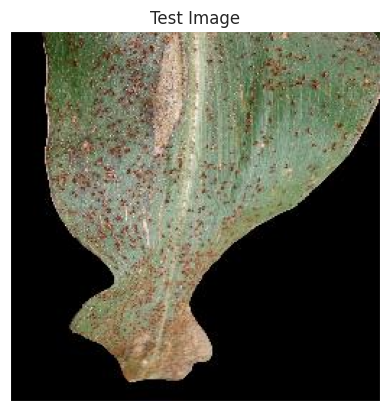

In [47]:
#Test Image Visualization
import cv2
image_path = '/content/output1/test/Common_Rust/Corn_Common_Rust (1020).JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [50]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model_corn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


In [51]:
print(predictions)

[[0. 1. 0. 0.]]


In [52]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


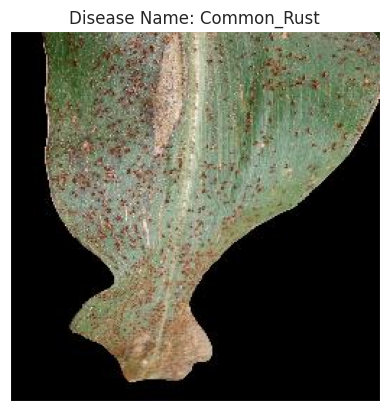

In [53]:
# Displaying the disease prediction
model_prediction = ClassNames1[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# ***Deploying to streamlit app***

In [72]:
!pip install streamlit
import streamlit as st
import tensorflow as tf
import numpy as np


#Tensorflow Model Prediction
def model_prediction(test_image):
    model = tf.keras.models.load_model("corn_disease_model.keras")
    image = tf.keras.preprocessing.image.load_img(test_image,target_size=(224,224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr]) #convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions) #return index of max element

#Sidebar
st.sidebar.title("Dashboard")
app_mode = st.sidebar.selectbox("Select Page",["Home","About","Corn leaf disease Identification"])

#Main Page
if(app_mode=="Home"):
    st.header("Corn disease Identification system")
    image_path = "/content/output1/test/Common_Rust/Corn_Common_Rust (1020).JPG"
    st.image(image_path,use_column_width=True)
    st.markdown("""
    Welcome to the Corn Disease Identification System! 🌿🔍

    Our mission is to help in identifying corn diseases efficiently. Upload an image of a leaf, and our system will analyze it to detect any signs of diseases. Together, let's protect our crops and ensure a healthier harvest!

    ### How It Works
    1. **Upload Image:** Go to the **Disease Recognition** page and upload an image of a plant with suspected diseases.
    2. **Analysis:** Our system will process the image using advanced algorithms to identify potential diseases.
    3. **Results:** View the results and recommendations for further action.

    ### Why Choose Us?
    - **Accuracy:** Our system utilizes state-of-the-art machine learning techniques for accurate disease detection.
    - **User-Friendly:** Simple and intuitive interface for seamless user experience.
    - **Fast and Efficient:** Receive results in seconds, allowing for quick decision-making.

    ### Get Started
    Click on the **Disease Recognition** page in the sidebar to upload an image and experience the power of our Plant Disease Recognition System!

    ### About Us
    Learn more about the project, our team, and our goals on the **About** page.
    """)

#About Project
elif(app_mode=="About"):
    st.header("About")
    st.markdown("""
                #### About Dataset
                This dataset is recreated using offline augmentation from the original dataset.The original dataset can be found on this github repo.
                This dataset consists of about 4188 rgb images of healthy and diseased maize crop leaves..

                """)

#Prediction Page
elif(app_mode=="Crop leaf disease Identification"):
    st.header("Corn leaf disease Recognition")
    test_image = st.file_uploader("Choose an Image:", type = ["jpg", "png"])
    if test_image is not None:
        image = Image.open(input_image)
        st.image(image, caption='Uploaded Corn Image', use_column_width=True)
    #Predict button
    if(st.button("Predict")):
        st.snow()
        st.write("Our Prediction")
        result_index = model_prediction(test_image)
        #Reading Labels
        class_name = ['','Common_Rust','Blight','Gray_Leaf_Spot','Healthy']
        #Displaying the disease prediction
        st.success("Model is Predicting it's a {}".format(class_name[result_index]))

In [73]:
code = '''
import streamlit as st
import tensorflow as tf
import numpy as np


#Tensorflow Model Prediction
def model_prediction(test_image):
    model = tf.keras.models.load_model("corn_disease_model.keras")
    image = tf.keras.preprocessing.image.load_img(test_image,target_size=(224,224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr]) #convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions) #return index of max element

#Sidebar
st.sidebar.title("Dashboard")
app_mode = st.sidebar.selectbox("Select Page",["Home","About","Corn leaf disease Identification"])

#Main Page
if(app_mode=="Home"):
    st.header("Corn disease Identification system")
    image_path = "/content/output1/test/Common_Rust/Corn_Common_Rust (1020).JPG"
    st.image(image_path,use_column_width=True)
    st.markdown("""
    Welcome to the Corn Disease Identification System! 🌿🔍

    Our mission is to help in identifying corn diseases efficiently. Upload an image of a leaf, and our system will analyze it to detect any signs of diseases. Together, let's protect our crops and ensure a healthier harvest!

    ### How It Works
    1. **Upload Image:** Go to the **Disease Recognition** page and upload an image of a plant with suspected diseases.
    2. **Analysis:** Our system will process the image using advanced algorithms to identify potential diseases.
    3. **Results:** View the results and recommendations for further action.

    ### Why Choose Us?
    - **Accuracy:** Our system utilizes state-of-the-art machine learning techniques for accurate disease detection.
    - **User-Friendly:** Simple and intuitive interface for seamless user experience.
    - **Fast and Efficient:** Receive results in seconds, allowing for quick decision-making.

    ### Get Started
    Click on the **Disease Recognition** page in the sidebar to upload an image and experience the power of our Plant Disease Recognition System!

    ### About Us
    Learn more about the project, our team, and our goals on the **About** page.
    """)

#About Project
elif(app_mode=="About"):
    st.header("About")
    st.markdown("""
                #### About Dataset
                This dataset is recreated using offline augmentation from the original dataset.The original dataset can be found on this github repo.
                This dataset consists of about 4188 rgb images of healthy and diseased maize crop leaves..

                """)

#Prediction Page
elif(app_mode=="Crop leaf disease Identification"):
    st.header("Corn leaf disease Recognition")
    test_image = st.file_uploader("Choose an Image:", type = ["jpg", "png"])
    if test_image is not None:
        image = Image.open(input_image)
        st.image(image, caption='Uploaded Corn Image', use_column_width=True)

    #Predict button
    if(st.button("Predict")):
        st.snow()
        st.write("Our Prediction")
        result_index = model_prediction(test_image)
        #Reading Labels
        class_name = ['','Common_Rust','Blight','Gray_Leaf_Spot','Healthy']
        #Displaying the disease prediction
        st.success("Model is Predicting it's a {}".format(class_name[result_index]))
'''
#Save to a Python file
with open('corn_streamlit.py', 'w') as file:
    file.write(code)

In [66]:
!pip freeze > requirements.txt
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
files.download('corn_streamlit.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
!pip install pyngrok

In [75]:
from pyngrok import ngrok
ngrok.set_auth_token('2kvOsZMdbw3f7Mk7gq6JusqQeGZ_MoMpfGuSqErFCkoqLhDR')
!nohup streamlit run corn_streamlit.py &
ngrok_tunnel = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print('Tunnel URL:', ngrok_tunnel.public_url)

nohup: appending output to 'nohup.out'
Tunnel URL: https://f91b-34-87-137-75.ngrok-free.app


In [70]:
ngrok.kill()

# ***Testing***

In [ ]:
y_pred1 = corn_model.predict(test_data1)
y_pred1, y_pred1.shape()

In [ ]:
y_pred = cassava_model.predict(test_data)
y_pred, y_pred.shape()